<a href="https://colab.research.google.com/github/kmalicekim/NLP_practice_mine/blob/master/3_%EA%B7%B8%EB%9E%98%ED%94%84%26%EC%9B%8C%EB%93%9C%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3.1 단어 빈도 그래프

In [2]:
import nltk
nltk.download('punkt')
nltk.download('webtext')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Package webtext is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
import nltk
nltk.download('gutenberg') #nltk에서 제공하는 문서 examples

from nltk.corpus import gutenberg
file_names = gutenberg.fileids() # 파일 제목 읽어오기

print(file_names)

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [4]:
doc_alice = gutenberg.open('carroll-alice.txt').read()   #open 뒤 read() 꼭 붙여주기
print('#Num of characters used:', len(doc_alice)) #사용된 문자의 수
print('#Text samples:')
print(doc_alice[:500]) #앞의 500글자만 출력


#Num of characters used: 144395
#Text samples:
[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy an


In [5]:
from nltk.tokenize import word_tokenize

tokens_alice = word_tokenize(doc_alice)
print('#Num of tokens used:', len(tokens_alice))
print('#Token sample')
print(tokens_alice[:20])


#Num of tokens used: 33494
#Token sample
['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 'beginning']


In [6]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

stem_tokens_alice = [stemmer.stem(token) for token in tokens_alice]
print('#Num of tokens after stemming:', len(stem_tokens_alice))
print('#Token sample:')
print(stem_tokens_alice[:20])

#Num of tokens after stemming: 33494
#Token sample:
['[', 'alic', "'s", 'adventur', 'in', 'wonderland', 'by', 'lewi', 'carrol', '1865', ']', 'chapter', 'i', '.', 'down', 'the', 'rabbit-hol', 'alic', 'wa', 'begin']


In [7]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

lem_tokens_alice = [lemmatizer.lemmatize(token) for token in tokens_alice]
print('#Num of tokens after stemming:', len(lem_tokens_alice))
print('#Token sample:')
print(lem_tokens_alice[:20])

#Num of tokens after stemming: 33494
#Token sample:
['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'wa', 'beginning']


In [8]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("['\w']{3,}")

reg_tokens_alice = tokenizer.tokenize(doc_alice.lower())
print('#Num of tokens with RegexpTokenizer:', len(reg_tokens_alice))

print('#Token sample:')
print(reg_tokens_alice[:20])

#Num of tokens with RegexpTokenizer: 21616
#Token sample:
["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'down', 'the', 'rabbit', 'hole', 'alice', 'was', 'beginning', 'get', 'very', 'tired', 'sitting', 'her', 'sister']


In [9]:
from nltk.corpus import stopwords #일반적으로 분석대상이 아닌 단어들
english_stops = set(stopwords.words('english'))

result_alice = [word for word in reg_tokens_alice if word not in english_stops]

print('#Num of tokens after stopword elimination:', len(result_alice))
print('#Token sample:')

print(result_alice[:20])

#Num of tokens after stopword elimination: 12999
#Token sample:
["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'rabbit', 'hole', 'alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped', 'book']


In [10]:
alice_word_count = dict()

for word in result_alice:
  alice_word_count[word] = alice_word_count.get(word,0)+1
print(alice_word_count)

print()
print('#Num of used words:', len(alice_word_count))


### value 기준으로 정렬할때 key값만 얻는것이 목적이라면 dict= sorted(dict, key=dict.get) ---> 이용하면 됨!!
### 즉, dict 자체를 sort 대상으로 넣고 .get 즉, value 자체를 key의 파라미터로 넣으면 정렬된 key 값이 리스트로 반환됨

sorted_word_count = sorted(alice_word_count, key=alice_word_count.get, reverse=True)
print(sorted_word_count)

print('#Top 20 high frenquency words:')
for key in sorted_word_count[:20]:
  print(f'{str(key)}: {alice_word_count[key]}', end=', ')


{"alice's": 12, 'adventures': 7, 'wonderland': 3, 'lewis': 1, 'carroll': 1, '1865': 1, 'chapter': 12, 'rabbit': 46, 'hole': 5, 'alice': 385, 'beginning': 14, 'get': 44, 'tired': 7, 'sitting': 10, 'sister': 8, 'bank': 3, 'nothing': 30, 'twice': 5, 'peeped': 3, 'book': 11, 'reading': 3, 'pictures': 4, 'conversations': 1, "'and": 56, 'use': 18, 'thought': 74, "'without": 1, 'conversation': 10, 'considering': 3, 'mind': 11, 'well': 40, 'could': 77, 'hot': 7, 'day': 29, 'made': 30, 'feel': 8, 'sleepy': 5, 'stupid': 3, 'whether': 11, 'pleasure': 2, 'making': 8, 'daisy': 1, 'chain': 1, 'would': 78, 'worth': 4, 'trouble': 6, 'getting': 22, 'picking': 2, 'daisies': 1, 'suddenly': 13, 'white': 30, 'pink': 1, 'eyes': 29, 'ran': 16, 'close': 13, 'remarkable': 2, 'think': 53, 'much': 51, 'way': 56, 'hear': 14, 'say': 51, "'oh": 23, 'dear': 28, 'shall': 23, 'late': 6, 'afterwards': 2, 'occurred': 2, 'ought': 14, 'wondered': 1, 'time': 71, 'seemed': 27, 'quite': 55, 'natural': 4, 'actually': 1, 'took

In [11]:
my_tag_set = ['NN', 'VB', 'VBD', 'JJ']
my_words = [word for word, tag in nltk.pos_tag(result_alice) if tag in my_tag_set]

alice_word_count = dict()
for word in my_words:
  alice_word_count[word] = alice_word_count.get(word, 0)+1

print('#Num of used words:', len(alice_word_count))

sorted_word_count = sorted(alice_word_count, key=alice_word_count.get, reverse=True)

print('#Top 20 high frenquency words:')
for key in sorted_word_count[:20]:
  print(f'{str(key)}: {alice_word_count.get(key)}', end=', ')

#Num of used words: 1726
#Top 20 high frenquency words:
said: 462, alice: 293, little: 124, went: 83, time: 71, queen: 66, began: 58, way: 56, turtle: 56, mock: 55, thought: 54, thing: 49, voice: 48, head: 46, gryphon: 45, got: 44, rabbit: 42, looked: 42, see: 42, came: 40, 

### 그래프로 그려보기

[462, 293, 124, 83, 71, 66, 58, 56, 56, 55]


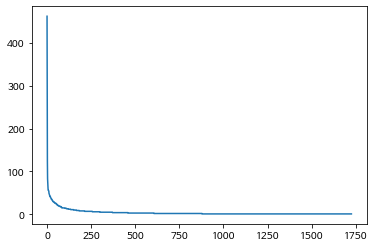

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

w = [alice_word_count[key] for key in sorted_word_count]
print(w[:10])

plt.plot(w)
plt.show()

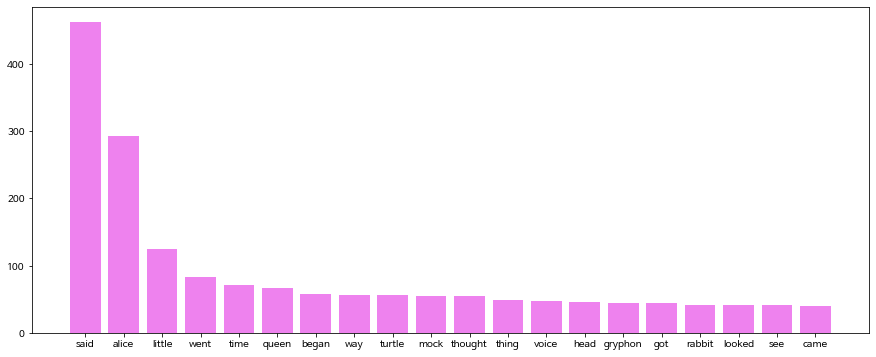

In [13]:
n = sorted_word_count[:20] #빈도수 상위 20개의 단어만 추출
w = [alice_word_count[key] for key in n]

plt.figure(figsize=(15,6))
plt.bar(range(len(n)), w, tick_label = n, color='violet')
plt.show()

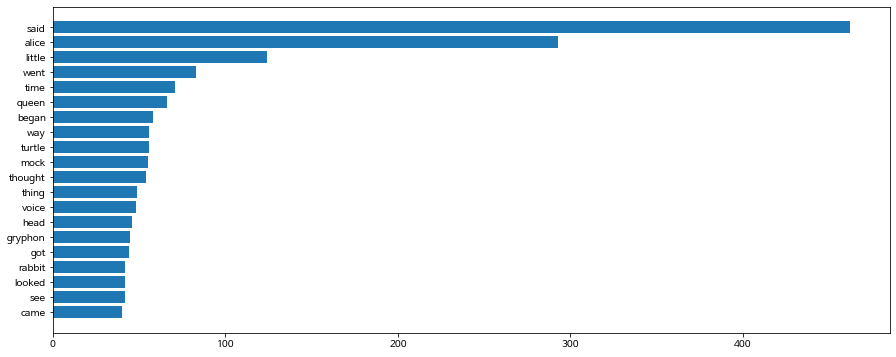

In [14]:
n = sorted_word_count[:20][::-1] #역순으로 출력
w = [alice_word_count[key] for key in n] #20개 단어에 대한 빈도

plt.figure(figsize=(15,6))
plt.barh(range(len(n)), w, tick_label=n)
plt.show()              

## 3.2 워드클라우드

In [15]:
# 설치
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


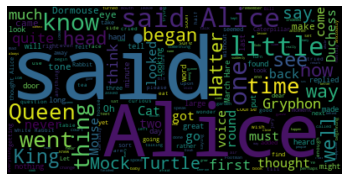

In [16]:
from wordcloud import WordCloud

#generate wordcloud image
wordcloud = WordCloud().generate(doc_alice)

plt.axis('off')

#interpolation:이미지를 어떻게 처리해서 보여줄지 결정. bilinear는 부드럽게, None 혹은 none은 이미지를 있는 그대로 보여줌
plt.imshow(wordcloud, interpolation='bilinear') 
plt.show()

In [17]:
wordcloud.to_array().shape

(200, 400, 3)

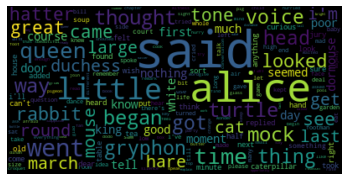

In [18]:
# 계산된 빈도를 이용하여 워드클라우드 생성하기

wordcloud = WordCloud(max_font_size=60).generate_from_frequencies(alice_word_count)
plt.figure()
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

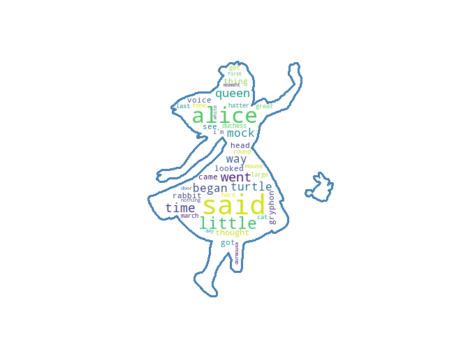

In [19]:
# 배경이미지를 불러와서 numpy array로 전환 필요 --- rgb

import numpy as np
from PIL import Image

alice_mask = np.array(Image.open('/content/sample_data/alice_mask.png'))

wc = WordCloud(background_color='white', 
               max_words=40,
               mask=alice_mask,  # 배경으로 사용할 이미지
               contour_width=3,  # 테두리 굵기
               contour_color='steelblue') # 테두리 색

wc.generate_from_frequencies(alice_word_count)

wc.to_file('/content/sample_data/alice.png')  # 결과를 이미지 파일로 저장

plt.figure(figsize=(8,10))
plt.axis('off')
plt.imshow(wc, interpolation='bilinear')
plt.show()
            

## 3.3 한국어 문서에 대한 그래프와 워드클라우드

In [20]:
# 예제로 사용할 텍스트 불러오기 (대한민국 헌법)
!pip install konlpy

from konlpy.corpus import kolaw # KoNLPy에서 실습을 위해 말뭉치를 제공하는 대한민국 헌법
const_doc = kolaw.open('constitution.txt').read()

print(type(const_doc))
print(len(const_doc))
print(const_doc[:600])


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
<class 'str'>
18884
대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.

       제1장 총강
  제1조 ① 대한민국은 민주공화국이다.
②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.
  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.
②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.
  제3조 대한민


In [21]:
from konlpy.tag import Okt
t = Okt()

tokens_const = t.morphs(const_doc) # 형태소 단위로 tokenize

print('#토큰의 수: ', len(tokens_const))
print('#앞 100개의 토큰')
print(tokens_const[:100])

#토큰의 수:  8796
#앞 100개의 토큰
['대한민국', '헌법', '\n\n', '유구', '한', '역사', '와', '전통', '에', '빛나는', '우리', '대', '한', '국민', '은', '3', '·', '1', '운동', '으로', '건립', '된', '대한민국', '임시정부', '의', '법', '통과', '불의', '에', '항거', '한', '4', '·', '19', '민주', '이념', '을', '계승', '하고', ',', '조국', '의', '민주', '개혁', '과', '평화', '적', '통일', '의', '사명', '에', '입', '각하', '여', '정의', '·', '인도', '와', '동포', '애', '로써', '민족', '의', '단결', '을', '공고', '히', '하고', ',', '모든', '사회', '적', '폐습', '과', '불의', '를', '타파', '하며', ',', '자율', '과', '조화', '를', '바탕', '으로', '자유민주', '적', '기', '본', '질서', '를', '더욱', '확고히', '하여', '정치', '·', '경제', '·', '사회', '·']


In [22]:
# 보통 워드클라우드 그릴 때는 명사만 사용하는 것이 일반적

tokens_const = t.nouns(const_doc) # 형태소 단위로 tokenize 후 '명사'만 추출

print('#토큰의 수: ', len(tokens_const))
print('#앞 100개의 토큰')
print(tokens_const[:100])

#토큰의 수:  3882
#앞 100개의 토큰
['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '법', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '입', '각하', '정의', '인도', '동포', '애', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제', '사회', '문화', '모든', '영역', '각인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '안', '국민', '생활', '향상', '기하', '밖', '항구', '세계', '평화', '인류', '공영', '이바지', '함', '우리', '우리', '자손', '안전', '자유', '행복', '확보', '것', '다짐', '제정', '차', '개정', '헌법', '이제', '국회', '의결', '국민투표', '개정', '제', '장', '강', '제', '대한민국', '민주공화국', '대한민국']


In [23]:
# 1자로 된 명사 삭제 ('애, 것, 함, 제, 장' 과 같은 1자 명사는 의미 부여하기 힘들기 때문)

tokens_const = [token for token in tokens_const if len(token)>1]

print('#토큰의 수: ', len(tokens_const))
print('#앞 100개의 토큰')
print(tokens_const[:100])

#토큰의 수:  3013
#앞 100개의 토큰
['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '각하', '정의', '인도', '동포', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제', '사회', '문화', '모든', '영역', '각인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '국민', '생활', '향상', '기하', '항구', '세계', '평화', '인류', '공영', '이바지', '우리', '우리', '자손', '안전', '자유', '행복', '확보', '다짐', '제정', '개정', '헌법', '이제', '국회', '의결', '국민투표', '개정', '대한민국', '민주공화국', '대한민국', '주권', '국민', '모든', '권력', '국민', '대한민국', '국민', '요건', '법률', '국가', '법률', '재외국민']


In [24]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

[('조직', 18), ('국회의원', 18), ('임기', 18), ('직무', 19), ('국무총리', 19), ('자유', 20), ('정부', 20), ('선거', 20), ('임명', 20), ('권리', 21), ('의원', 21), ('사항', 23), ('기타', 26), ('모든', 37), ('헌법', 53), ('국민', 61), ('국회', 68), ('국가', 73), ('대통령', 83), ('법률', 127)]


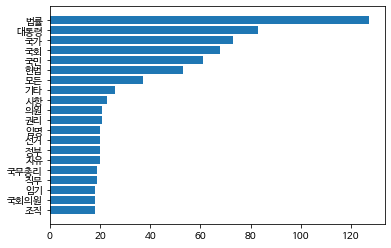

In [36]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

# from matplotlib import font_manager, rc 
# rc('font', family='AppleGothic')
# plt.rcParams['axes.unicode_minus'] = False


const_cnt = {}
for word in tokens_const:
  const_cnt[word] = const_cnt.get(word,0)+1


# a = [3, 2, 1,]
# b = ['a', 'b', 'c']
# ret = zip(a, b)
# the_list = sorted(ret)  
# the_list >> [(1, 'c'), (2, 'b'), (3, 'a')]
# ===> zip(*the_list) is equal to zip((1, 'c'), (2, 'b'), (3, 'a'))


def word_graph(cnt, max_words=10):
  
  sorted_w = sorted(cnt.items(), key=lambda kv:kv[1]) # key값을 기준으로 정렬을 하겠다
  print(sorted_w[-max_words:])
  n,w = zip(*sorted_w[-max_words:])

  plt.barh(range(len(n)), w, tick_label=n)
  plt.show()

word_graph(const_cnt, max_words=20)



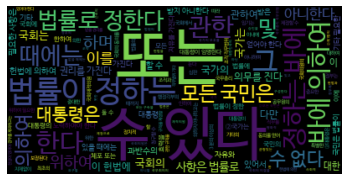

In [40]:
font_path = 'NanumBarunGothic'

wordcloud=WordCloud(font_path=font_path).generate(const_doc)
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

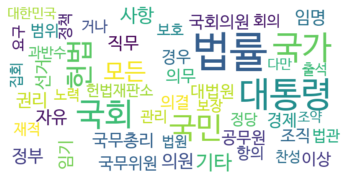

In [42]:
# 필요없는 단어 제외

wordcloud = WordCloud( 
    font_path = font_path,
    max_font_size = 100,
    width = 800,
    height = 400,
    background_color = 'white',
    max_words=50)

wordcloud.generate_from_frequencies(const_cnt)

wordcloud.to_file('const.png')
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()